# Importação das bibliotecas

In [24]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

# Pré-Processamento

In [25]:
data = pd.read_csv('breast-cancer-wisconsin.csv')

In [26]:
# Atribuindo nomes para os atributos do datasets
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

In [27]:
data.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [28]:
data.describe()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [29]:
data.info() # Para identificar os valores faltantes e os tipos das colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code                  698 non-null    int64 
 1   Clump Thickness              698 non-null    int64 
 2   Uniformity of Cell Size      698 non-null    int64 
 3   Uniformity of Cell Shape     698 non-null    int64 
 4   Marginal Adhesion            698 non-null    int64 
 5   Single Epithelial Cell Size  698 non-null    int64 
 6   Bare Nuclei                  698 non-null    object
 7   Bland Chromatin              698 non-null    int64 
 8   Normal Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [30]:
data['Bare Nuclei'].unique() # Verificar os valores unicos do atributo

array(['10', '2', '4', '1', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [31]:
data['Bare Nuclei'] = data['Bare Nuclei'].replace('?', np.nan) # Converter os "?" para NaN

In [32]:
data = data.dropna() # Aqui foi eliminados os valores NaN

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code                  682 non-null    int64 
 1   Clump Thickness              682 non-null    int64 
 2   Uniformity of Cell Size      682 non-null    int64 
 3   Uniformity of Cell Shape     682 non-null    int64 
 4   Marginal Adhesion            682 non-null    int64 
 5   Single Epithelial Cell Size  682 non-null    int64 
 6   Bare Nuclei                  682 non-null    object
 7   Bland Chromatin              682 non-null    int64 
 8   Normal Nucleoli              682 non-null    int64 
 9   Mitoses                      682 non-null    int64 
 10  Class                        682 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 63.9+ KB


In [34]:
data['Bare Nuclei']=data['Bare Nuclei'].astype('int64') # Linha para converter o atributo Bare Nuclei para o 
                                                        # tipo inteiro

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code                  682 non-null    int64
 1   Clump Thickness              682 non-null    int64
 2   Uniformity of Cell Size      682 non-null    int64
 3   Uniformity of Cell Shape     682 non-null    int64
 4   Marginal Adhesion            682 non-null    int64
 5   Single Epithelial Cell Size  682 non-null    int64
 6   Bare Nuclei                  682 non-null    int64
 7   Bland Chromatin              682 non-null    int64
 8   Normal Nucleoli              682 non-null    int64
 9   Mitoses                      682 non-null    int64
 10  Class                        682 non-null    int64
dtypes: int64(11)
memory usage: 63.9 KB


In [36]:
data = data.drop_duplicates() # Eliminar os valores duplicatas

In [37]:
X = data.iloc[:,0:9].values # Seleciona as colunas

In [38]:
y = data.iloc[:,10].values # seleciona a colunas previsores

# Aplicações de Machine Learning

In [39]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

## Ávore de decisão

In [40]:
arvore = DecisionTreeClassifier()
arvore.fit(X_treino, y_treino)

DecisionTreeClassifier()

In [41]:
previsao = arvore.predict(X_teste)

In [42]:
confusao = confusion_matrix(y_teste,previsao)
confusao

array([[130,   8],
       [  7,  58]], dtype=int64)

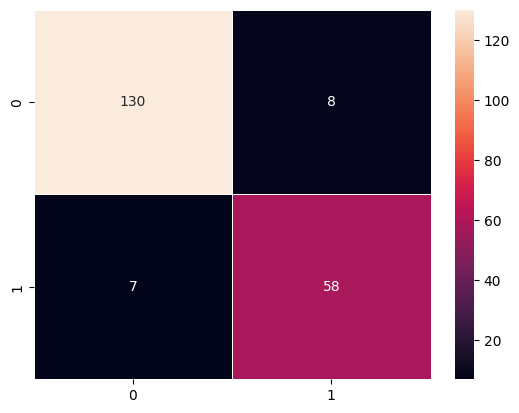

In [43]:
# Gerar o gráfico da matriz de confusão da Árvore de Decisão
sns.heatmap(confusao, annot=True, fmt="d", linewidths=.5);

In [44]:
taxa_acerto = accuracy_score(y_teste,previsao)
taxa_acerto

0.9261083743842364

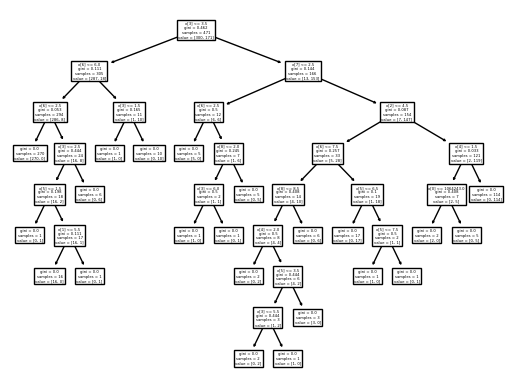

In [53]:
tree.plot_tree(arvore);

In [56]:
export_graphviz(arvore,out_file='arquivo/Arvore.pdf')

In [58]:
from graphviz import Source
path = 'arquivo/Arvore.pdf'
sc = Source.from_file(path)
sc.view()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## K-NN

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_treino,y_treino)

KNeighborsClassifier()

In [49]:
previsaoKnn = knn.predict(X_teste)

In [50]:
confusaoKnn = confusion_matrix(y_teste,previsaoKnn)
confusaoKnn

array([[117,  21],
       [ 40,  25]], dtype=int64)

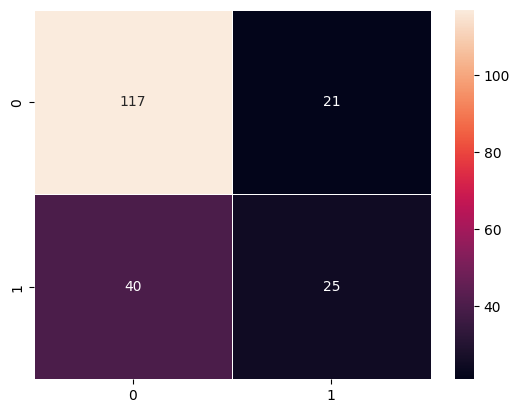

In [51]:
# Gerar o gráfico da matriz de confusão do KNN
sns.heatmap(confusaoKnn, annot=True, fmt="d", linewidths=.5);

In [52]:
taxa_acertoKnn = accuracy_score(y_teste,previsaoKnn)
taxa_acertoKnn

0.6995073891625616